In [56]:
%pip install -r ../requirements.txt


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\airwo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('./data/churn.csv')

In [59]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [60]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

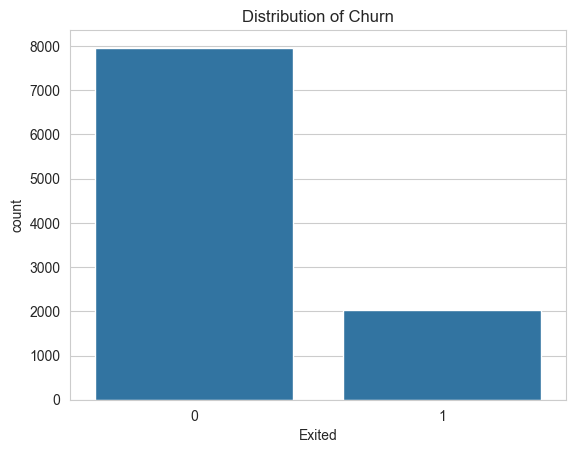

In [61]:
sns.countplot(x="Exited", data=df)
plt.title("Distribution of Churn")
plt.show()

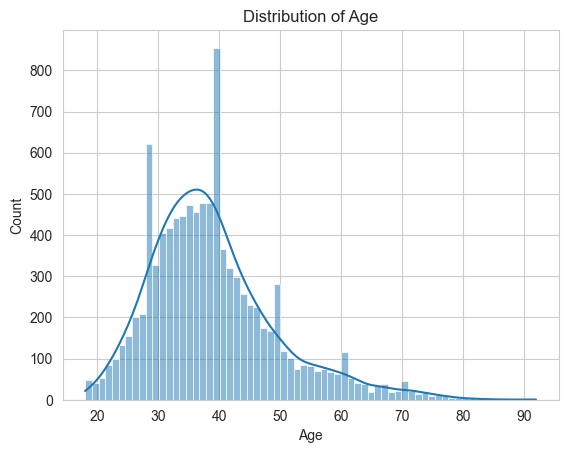

In [62]:
sns.histplot(data=df, x="Age", kde=True)
plt.title("Distribution of Age")
plt.show()

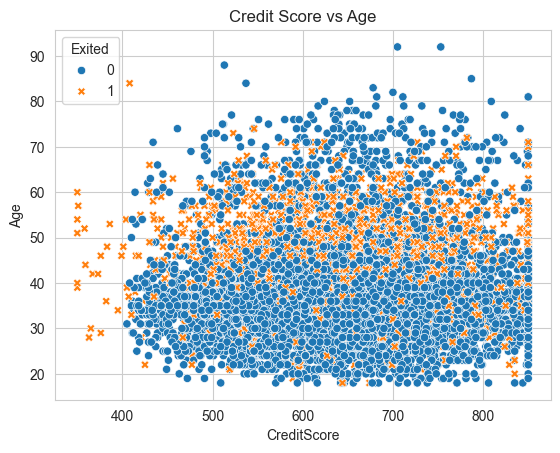

In [63]:
sns.scatterplot(data=df, x="CreditScore", y="Age", hue="Exited", style="Exited")
plt.title("Credit Score vs Age")
plt.show()

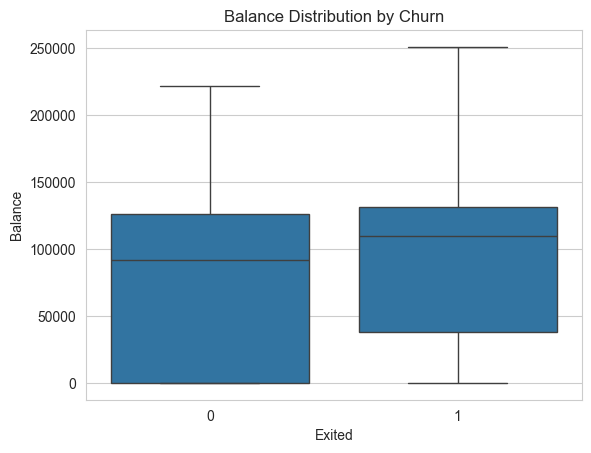

In [64]:
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance Distribution by Churn")
plt.show()


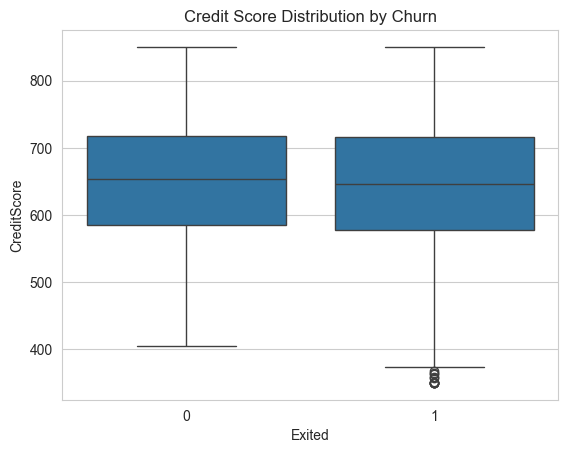

In [65]:
sns.boxplot(x="Exited", y="CreditScore", data=df)
plt.title("Credit Score Distribution by Churn")
plt.show()

In [66]:
features = df.drop('Exited', axis=1)

In [67]:
features.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [68]:
target = df['Exited']
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [69]:
features = features.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [70]:
features = features.dropna()
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [71]:
features = pd.get_dummies(features, columns=['Geography', 'Gender'])
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [73]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [75]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ...,  1.73494238,
        -0.91324755,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57638802,
         1.09499335, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ..., -0.57638802,
        -0.91324755,  0.91324755]])

In [76]:
X_train[0]

array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
        0.64920267,  0.97481699,  1.36766974,  1.00150113, -0.57946723,
       -0.57638802, -0.91324755,  0.91324755])

In [77]:
X_train[1]

array([-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  0.80843615,
        0.64920267,  0.97481699,  1.6612541 , -0.99850112,  1.72572313,
       -0.57638802, -0.91324755,  0.91324755])

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [79]:
lr_model = LogisticRegression(random_state=42)

In [80]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [81]:
lr_predictions = lr_model.predict(X_test)
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_accuracy

0.811

In [83]:
def evaluated_and_save_model(model, X_train, X_test, y_train, y_test, filename):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test, predictions)}")
    print("--------------")
    
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
        
    print(f"Model saved as {filename}")

In [84]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluated_and_save_model(xgb_model, X_train, X_test, y_train, y_test, './out/xgb_model.pkl')

dt_model = DecisionTreeClassifier(random_state=42)
evaluated_and_save_model(dt_model, X_train, X_test, y_train, y_test, './out/dt_model.pkl')

rf_model = RandomForestClassifier(random_state=42)
evaluated_and_save_model(rf_model, X_train, X_test, y_train, y_test, './out/rf_model.pkl')

svc_model = SVC(random_state=42)
evaluated_and_save_model(svc_model, X_train, X_test, y_train, y_test, './out/svc_model.pkl')

nb_model = GaussianNB()
evaluated_and_save_model(nb_model, X_train, X_test, y_train, y_test, './out/nb_model.pkl')

knn_model = KNeighborsClassifier()
evaluated_and_save_model(knn_model, X_train, X_test, y_train, y_test, './out/knn_model.pkl')

XGBClassifier Accuracy: 0.7455

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.83      1607
           1       0.39      0.54      0.45       393

    accuracy                           0.75      2000
   macro avg       0.63      0.67      0.64      2000
weighted avg       0.78      0.75      0.76      2000

--------------
Model saved as ./out/xgb_model.pkl
DecisionTreeClassifier Accuracy: 0.7850

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.51      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.79      0.79      2000

--------------
Model saved as ./out/dt_model.pkl
RandomForestClassifier Accuracy: 0.8645

Classification Report:
              precision    recall  f1-score   support

         

In [85]:
feature_importances  = xgb_model.feature_importances_
feature_names = features.columns

In [86]:
feature_importances

array([0.03500515, 0.10955004, 0.03005428, 0.05278617, 0.32388842,
       0.03194035, 0.16414644, 0.03265523, 0.04646329, 0.09137332,
       0.0368547 , 0.04528258, 0.        ], dtype=float32)

In [87]:
feature_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [88]:
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

In [89]:
feature_importances_df

,Feature,Importance
0,CreditScore,0.035005
1,Age,0.109550
2,Tenure,0.030054
3,Balance,0.052786
4,NumOfProducts,0.323888
5,HasCrCard,0.031940
6,IsActiveMember,0.164146
7,EstimatedSalary,0.032655
8,Geography_France,0.046463
9,Geography_Germany,0.091373


In [90]:
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
feature_importances_df

,Feature,Importance
4,NumOfProducts,0.323888
6,IsActiveMember,0.164146
1,Age,0.109550
9,Geography_Germany,0.091373
3,Balance,0.052786
8,Geography_France,0.046463
11,Gender_Female,0.045283
10,Geography_Spain,0.036855
0,CreditScore,0.035005
7,EstimatedSalary,0.032655


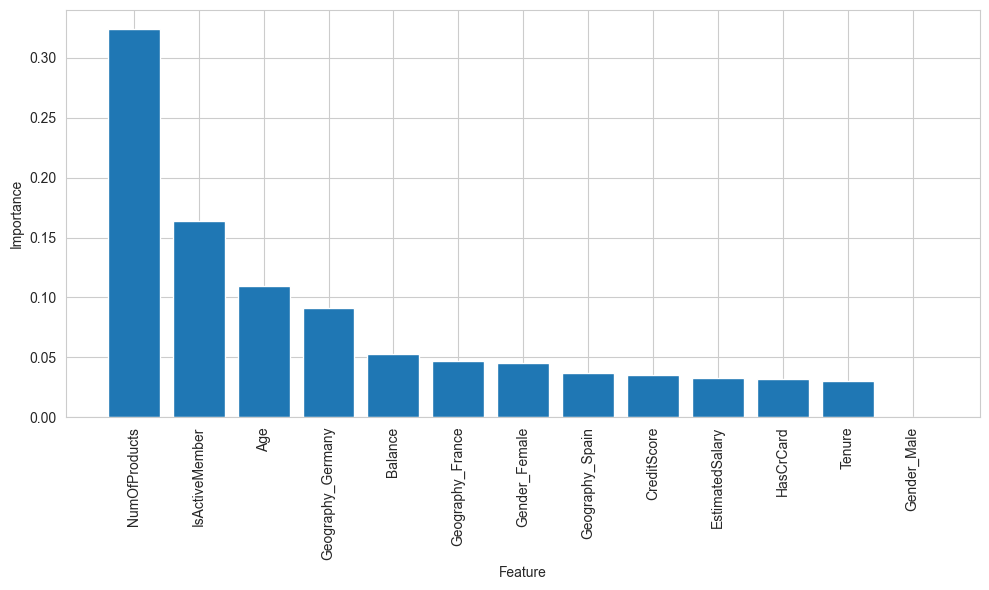

In [91]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [92]:
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [93]:
features['CLV'] = df['Balance'] * df['EstimatedSalary'] / 100000

In [94]:
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400


In [95]:
features['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])

In [96]:
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,Middle-aged
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,Middle-aged
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,Middle-aged
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,Middle-aged
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,Middle-aged


In [97]:
features['TenureAgeRatio'] = df['Tenure'] / df['Age']

In [98]:
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup,TenureAgeRatio
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,Middle-aged,0.047619
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,Middle-aged,0.024390
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,Middle-aged,0.190476
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,Middle-aged,0.025641
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,Middle-aged,0.046512


In [99]:
features = pd.get_dummies(features, drop_first=True)

In [100]:
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_Middle-aged,AgeGroup_Senior,AgeGroup_Elderly
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,0.047619,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,0.024390,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,0.190476,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,0.025641,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,0.046512,True,False,False


In [101]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [102]:
xgb_model = xgb.XGBClassifier(random_state=42)

evaluated_and_save_model(xgb_model, X_train, X_test, y_train, y_test, './out/xgb_model_improved.pkl')

XGBClassifier Accuracy: 0.8540

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.50      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000

--------------
Model saved as ./out/xgb_model_improved.pkl


In [103]:
from imblearn.over_sampling import SMOTE

In [104]:
smote = SMOTE(random_state=42)

In [105]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [106]:
evaluated_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, './out/xgb_model_smote.pkl')

XGBClassifier Accuracy: 0.8545

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.55      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.85      0.85      0.85      2000

--------------
Model saved as ./out/xgb_model_smote.pkl


In [107]:
from sklearn.ensemble import VotingClassifier

In [108]:
voting_model = VotingClassifier(
  estimators=[
    ('xgboost', xgb.XGBClassifier(random_state=42)), 
    ('rf', RandomForestClassifier(random_state=42)),
    ('svm', SVC(random_state=42, probability=True)),
  ], 
  voting='hard' # soft or hard
)
evaluated_and_save_model(voting_model, X_resampled, X_test, y_resampled, y_test, './out/voting_model.pkl')


VotingClassifier Accuracy: 0.8530

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.63      0.59      0.61       393

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000

--------------
Model saved as ./out/voting_model.pkl
